In [37]:
%matplotlib inline
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
import pandas as pd

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [38]:
data = pd.read_csv('../data/train.csv')
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
# cols_used = data.drop(['SalePrice', 'Id'], axis=1).select_dtypes(exclude=['object']).columns
cols_used = ['1stFlrSF', 'LotArea', 'BedroomAbvGr']
X = data[cols_used]

my_imputer = Imputer()
imputed_X = my_imputer.fit_transform(X)

train_x, test_x, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

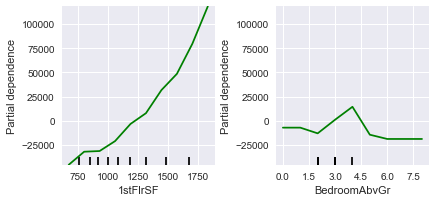

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

# scikit-learn originally implemented partial dependence plots only for Gradient Boosting models
# this was due to an implementation detail, and a future release will support all model types.
my_model = GradientBoostingRegressor()
# fit the model as usual
my_model.fit(imputed_X, y)
# Here we make the plot
my_plots = plot_partial_dependence(my_model,       
                                   features=[0, 2], # column numbers of plots we want to show
                                   X=imputed_X,            # raw predictors data.
                                   feature_names=cols_used, # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis